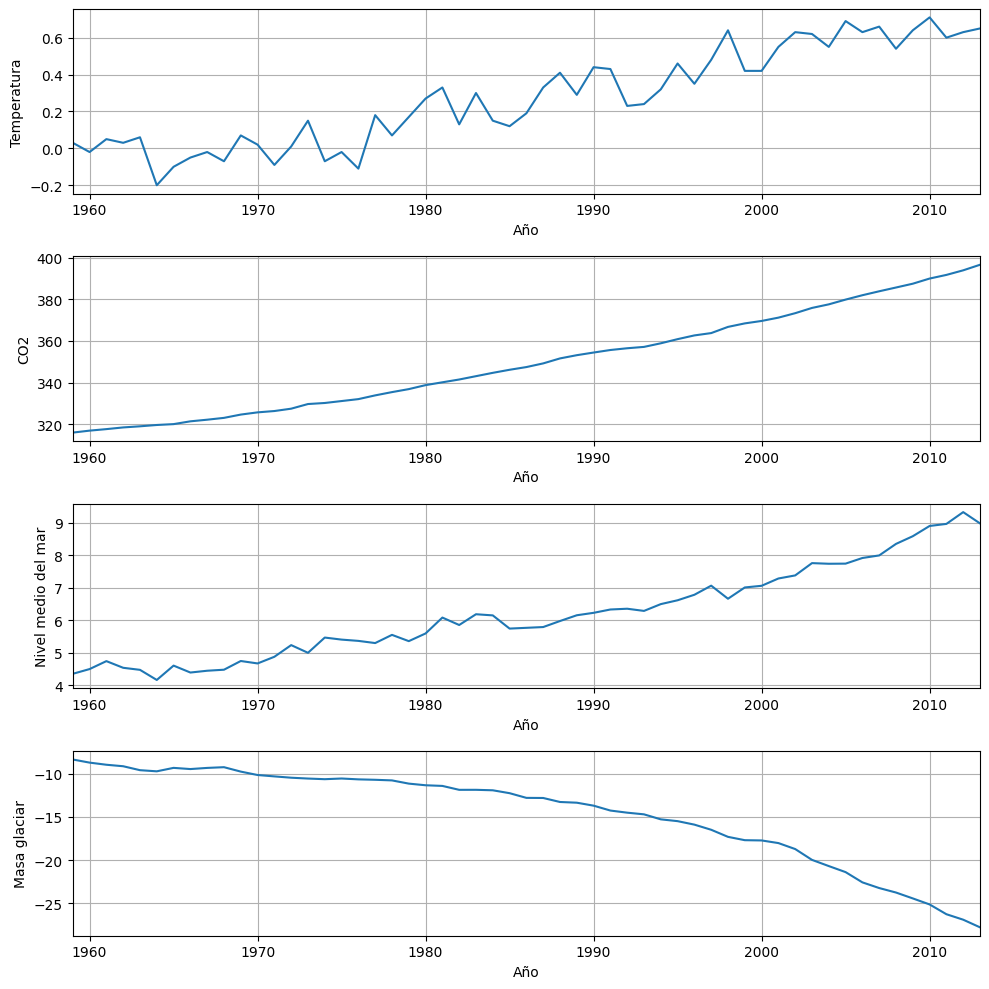

Pendiente: 
 [[ 4.39312079  7.21539814 -3.83224388]]
Término independiente: 
 [252.83908309]
El modelo de regresión es: y = 252.839083 + 4.393121 * X1 + 7.215398 * X2 + -3.832244 * X3
Error o pérdida del modelo de regresión lineal para valores de entrenamiento
ECM : 4.92
Coeficiente de Correlación: 0.98
Error o pérdida del modelo de regresión lineal para valores de test
ECM : 390.19
Coeficiente de Correlación: -4.09
La predicción de CO2 para X1=0.8, X2=0.3 y X3=-6.8 es:  [[284.57745751]]


<ipython-input-1-1a74c2f98b2c>:130: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('El modelo de regresión es: y = %f + %f * X1 + %f * X2 + %f * X3' % (t0, t1[0][0], t1[0][1], t1[0][2]))


In [1]:
# Importar las librerías necesarias
import urllib.request, json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Descargar y leer la información de partida (Datasets)

# URLs de los datasets
temp_url = "https://pkgstore.datahub.io/core/global-temp/annual_json/data/529e69dbd597709e36ce11a5d0bb7243/annual_json.json"
co2_url = "https://pkgstore.datahub.io/core/co2-ppm/co2-annmean-mlo_json/data/31185d494d1a6f6431aee8b8004b6164/co2-annmean-mlo_json.json"
sea_url = "https://pkgstore.datahub.io/core/sea-level-rise/epa-sea-level_json/data/ac016d75688136c47a04ac70298e42ec/epa-sea-level_json.json"
glaciar_url = "https://pkgstore.datahub.io/core/glacier-mass-balance/glaciers_json/data/6270342ca6134dadf8f94221be683bc6/glaciers_json.json"

# Cargar los datos de cada URL
with urllib.request.urlopen(temp_url) as url:
    temp_data = json.loads(url.read().decode())

with urllib.request.urlopen(co2_url) as url:
    co2_data = json.loads(url.read().decode())

with urllib.request.urlopen(sea_url) as url:
    sea_data = json.loads(url.read().decode())

with urllib.request.urlopen(glaciar_url) as url:
    glaciar_data = json.loads(url.read().decode())

# Registrar los valores en listas
temp = []
co2 = []
sea = []
glaciar = []
year = []

ntemp = len(temp_data)
nco2 = len(co2_data)
nsea = len(sea_data)
nglaciar = len(glaciar_data)

# Registro de temperaturas desde el año 1880
for i in range(ntemp):
    if temp_data[i]["Source"] == "GISTEMP":
        temp.append(temp_data[i]["Mean"])
        year.append(temp_data[i]["Year"])

# Las listas de temperatura y años están en orden decreciente (de 2016 a 1880), las ordenamos en orden creciente
temp.reverse()
year.reverse()

# Nos quedamos con la serie desde 1959 hasta 2013
temp = temp[1959-1880:2013-1880+1]
year = year[1959-1880:2013-1880+1]

# Registro de CO2 desde el año 1959
for i in range(nco2):
    co2.append(co2_data[i]["Mean"])
co2 = co2[:2013-1959+1]

# Registro del nivel medio del mar desde 1959 hasta 2013
for i in range(nsea):
    sea.append(sea_data[i]["CSIRO Adjusted Sea Level"])
sea = sea[1959-1880:2013-1880+1]

# Registro de la masa media de los glaciares desde 1959 hasta 2013
for i in range(nglaciar):
    glaciar.append(glaciar_data[i]["Mean cumulative mass balance"])
glaciar = glaciar[1959-1945:2013-1945+1]

# Visualizar la temperatura, CO2, nivel del mar y masa glaciar
fig, axs = plt.subplots(4, 1, figsize=(10,10))

axs[0].plot(year, temp)
axs[0].set_xlim(1959, 2013)
axs[0].set_xlabel("Año")
axs[0].set_ylabel("Temperatura")
axs[0].grid(True)

axs[1].plot(year, co2)
axs[1].set_xlim(1959, 2013)
axs[1].set_xlabel("Año")
axs[1].set_ylabel("CO2")
axs[1].grid(True)

axs[2].plot(year, sea)
axs[2].set_xlim(1959, 2013)
axs[2].set_xlabel("Año")
axs[2].set_ylabel("Nivel medio del mar")
axs[2].grid(True)

axs[3].plot(year, glaciar)
axs[3].set_xlim(1959, 2013)
axs[3].set_xlabel("Año")
axs[3].set_ylabel("Masa glaciar")
axs[3].grid(True)

fig.tight_layout()
plt.show()

# Crear el DataFrame con los datos utilizando pandas
datos = {'temp': temp, 'co2': co2, 'sea': sea, 'glaciar': glaciar}
df = pd.DataFrame(datos, columns=['temp', 'co2', 'sea', 'glaciar'])

# Asignar las variables X (atributos) e y (etiquetas)
X = df[['temp', 'sea', 'glaciar']]
y = df[['co2']]

# Dividimos el conjunto de datos para entrenamiento y test
X_train = np.array(X[:40])
y_train = np.array(y[:40])

X_test = np.array(X[40:])
y_test = np.array(y[40:])

# Crear el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Entrenar el modelo
regr.fit(X_train, y_train)

# Realizar predicciones sobre los atributos de entrenamiento
y_pred = regr.predict(X_train)

# Obtener los parámetros del modelo de regresión
t1 = regr.coef_
t0 = regr.intercept_
print('Pendiente: \n', t1)
print('Término independiente: \n', t0)
print('El modelo de regresión es: y = %f + %f * X1 + %f * X2 + %f * X3' % (t0, t1[0][0], t1[0][1], t1[0][2]))

# Calcular el error del ajuste del modelo de regresión
print("Error o pérdida del modelo de regresión lineal para valores de entrenamiento")
print("ECM : %.2f" % mean_squared_error(y_train, y_pred))
print('Coeficiente de Correlación: %.2f' % r2_score(y_train, y_pred))

# Comprobar con los valores de test si el ajuste es bueno
y_pred_test = regr.predict(X_test)
print("Error o pérdida del modelo de regresión lineal para valores de test")
print("ECM : %.2f" % mean_squared_error(y_test, y_pred_test))
print('Coeficiente de Correlación: %.2f' % r2_score(y_test, y_pred_test))

# Utilizar el modelo para predecir valores de la concentración de CO2
y_pred2 = regr.predict([[0.8, 0.3, -6.8]])
print('La predicción de CO2 para X1=0.8, X2=0.3 y X3=-6.8 es: ', y_pred2)